In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


**Preprocessing**

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


**EDA**

In [ ]:
import matplotlib.pyplot as plt


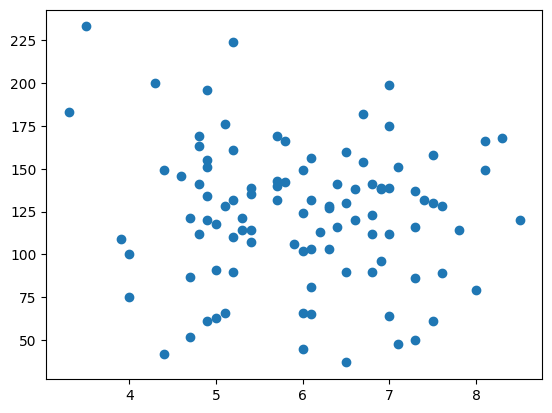

In [ ]:
plt.scatter(df['cgpa'],df['iq'])

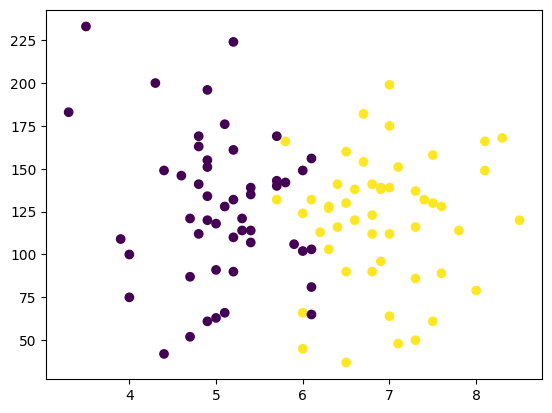

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

**Extract input and output columns**

In [ ]:
x = df.iloc[:,0:2] # Independent variables "cgpa" and "iq" are being stored here
y = df.iloc[:,-1]  # Dependent variable "placement" is being stored here

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
x.shape

(100, 2)

In [ ]:
y.shape

(100,)

**Splitting into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
52,7.0,175.0
33,6.0,149.0
14,6.1,103.0
71,6.1,132.0
40,4.9,134.0
...,...,...
93,6.8,112.0
49,5.4,135.0
34,4.8,163.0
42,7.6,89.0


In [ ]:
x_test

,cgpa,iq
89,4.9,151.0
88,4.4,149.0
91,7.5,158.0
55,7.8,114.0
17,3.3,183.0
31,3.9,109.0
23,4.7,87.0
38,6.5,160.0
87,5.7,132.0
4,5.8,142.0


In [ ]:
y_train

,placement
52,1
33,0
14,0
71,1
40,0
...,...
93,1
49,0
34,0
42,1


In [ ]:
y_test

,placement
89,0
88,0
91,1
55,1
17,0
31,0
23,0
38,1
87,1
4,0



**Scaling the values**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[ 0.87342069,  1.30792501],
       [-0.04704608,  0.66724163],
       [ 0.0450006 , -0.46627513],
       [ 0.0450006 ,  0.24833326],
       [-1.05955952,  0.2976166 ],
       [-1.05955952,  0.81509164],
       [-1.05955952,  1.82540005],
       [ 0.78137401, -0.63876681],
       [ 0.96546736, -1.8215669 ],
       [ 1.88593413,  0.66724163],
       [-0.96751284, -1.45194187],
       [-0.04704608, -1.89549191],
       [-0.87546617,  1.33256668],
       [ 1.88593413,  1.08614999],
       [-1.88797961, -0.54020014],
       [ 0.13704727, -0.21985844],
       [ 0.4131873 , -0.78661682],
       [ 0.87342069, -0.24450011],
       [ 0.96546736,  0.71652496],
       [-1.05955952, -0.04736676],
       [ 0.4131873 , -2.09262526],
       [-0.59932614, -0.19521677],
       [-0.96751284, -0.0966501 ],
       [ 0.68932733,  0.02655824],
       [ 1.33365407,  0.19904992],
       [-0.04704608, -0.4909168 ],
       [ 2.07002748,  1.13543333],
       [ 0.32114063,  0.47010828],
       [ 0.68932733,

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-1.05955952,  0.71652496],
       [-1.5197929 ,  0.66724163],
       [ 1.33365407,  0.88901664],
       [ 1.6097941 , -0.19521677],
       [-2.53230634,  1.50505836],
       [-1.98002628, -0.31842512],
       [-1.24365287, -0.86054183],
       [ 0.4131873 ,  0.93829998],
       [-0.32318611,  0.24833326],
       [-0.23113943,  0.49474995]])

**Model Training using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression() # Object named "clf" is created

In [ ]:
clf.fit(x_train,y_train) # Model gets trained here.

LogisticRegression()

**Model Evaluation**

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_test

,placement
89,0
88,0
91,1
55,1
17,0
31,0
23,0
38,1
87,1
4,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

**Visualization through Plotting**

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

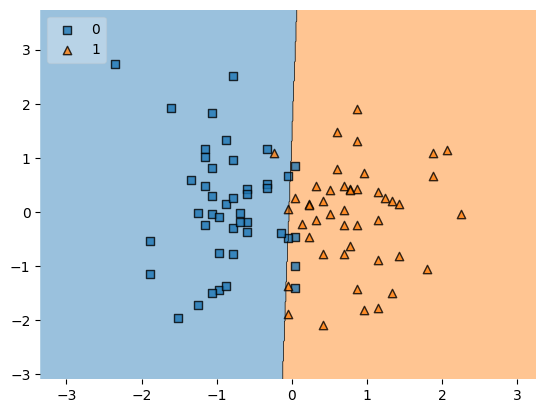

In [ ]:
plot_decision_regions(x_train,y_train.values,clf=clf, legend=2)